In [2]:
import agb.string.agbstring
import agb.image, agb.palette, agb.lz77
import struct
from pymap.project import Project
import json
from PIL import Image, ImageDraw
import numpy as np
from copy import deepcopy
import os
from collections import defaultdict
import pickle, pathlib
from tqdm import tqdm
import os.path as osp
import itertools

In [3]:
palette = np.zeros((16, 3), dtype=np.uint8)
palette[0] = [72, 72, 72] # background
palette[1] = [255, 160, 120] # light orange
palette[2] = [239, 140, 99] # light orange
palette[3] = [214, 107, 82] # dark orange
palette[4] = [187, 187, 187]
palette[5] = [174, 174, 174]
palette = agb.palette.Palette(palette)


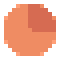

In [4]:
img = agb.image.Image(None, 16, 16, 4)

percentage = 26

for x, y, in itertools.product(range(16), range(16)):
    p = np.array([x - 7, y - 7])
    
    if (p**2).sum() < 7**2:
        #print(x - 7, x - 7, (x - 7)**2 + (y - 7)**2)
        phi = np.angle((x-7) + (y-7)*1j) + np.pi
        filled = (phi < (1 - percentage / 100) * 2 * np.pi + 0.05)
        
        if (p**2).sum() >= 45:
            img.data[y, x] = 1 if filled else 2

        else:
            img.data[y, x] = 2 if filled else 3
    


img.to_pil_image(palette.to_pil_palette()).resize((64, 64), resample=Image.Resampling.NEAREST)



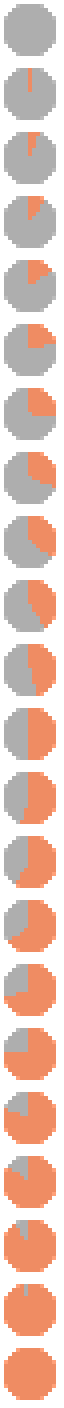

In [9]:
percentages = (0, 1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 100)
img = agb.image.Image(None, 16, 16 * len(percentages), 4)

for x, y, in itertools.product(range(16), range(16)):
    p = np.array([x - 7, y - 7])
    
    if (p**2).sum() < 7**2:
        #print(x - 7, x - 7, (x - 7)**2 + (y - 7)**2)
        for idx, percentage in enumerate(percentages):
            phi = np.angle((x-7) + (y-7)*1j) + np.pi
            filled = (phi < (1 - percentage / 100) * 2 * np.pi + 0.05)

            if (p**2).sum() >= 45:
                img.data[y, x + 16 * idx] = 4 if filled else 1

            else:
                img.data[y, x + 16 * idx] = 5 if filled else 2
    


img.to_pil_image(palette.to_pil_palette()).resize((64, 64 * len(percentages)), resample=Image.Resampling.NEAREST)


In [10]:

img.to_pil_image(palette.to_pil_palette())

In [32]:
len(percentages)

20